# Análisis de la evolución de la tasa de desempleo en Perú según datos del BCR

>Equipo: Los Miraculous

### Contenido

1. [Introducción](#introduccion)
1. [Fuentes de Datos](#fuentes-datos)
1. [Carga de Librerías](#carga-librerias)
1. [Carga y exploración](#carga-historico)
2. [DATA CLEANING Y FORMATTING](#clean)
3. [Análisis de Estadísticas Métricas](#est)
4. [Análisis de series temporales (VIZ)](#v)



## 2. Fuentes de Datos<a name="fuentes-datos"></a>

- Banco Central de Reserva del Perú (BCRP): Datos sobre la tasa de desempleo y otros indicadores económicos relevantes.


## 3. Carga de librerías<a name="carga-librerias"></a>

In [1]:
# Importamos librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import os

## 4. Carga y exploración <a name="carga-historico"></a>

In [2]:
# Leemos y observamos el primer dataset
path = 'BCR BDS'
desempleo_anual = pd.read_csv(os.path.join("BCR BDS/Desempleo Anual Internacional.csv"))


In [3]:
# Como observamos, la primera fila debería ser las etiquetas de las columnas 
desempleo_anual.loc[0:1]

,Unnamed: 0,PD39730DA
0,NaN,Indicadores Internacionales - EUA: Tasa desemp...
1,1929.0,3.2


In [4]:
# De todas maneras, la mejor opción es borrar la primera fila y cambiar los nombres de las columnas
desempleo_anual.columns = ['fecha','Tasa desempleo']
desempleo_anual.drop(0, axis=0,inplace=True)

In [5]:
desempleo_anual

,fecha,Tasa desempleo
1,1929.0,3.2
2,1930.0,8.7
3,1931.0,15.9
4,1932.0,23.6
5,1933.0,24.9
...,...,...
89,2017.0,4.1
90,2018.0,3.9
91,2019.0,3.6
92,2020.0,6.7


In [6]:
# Verificamos nulos
desempleo_anual.isna().sum()

fecha             0
Tasa desempleo    0
dtype: int64

In [7]:
# Transformamos la columna fechas a integers
desempleo_anual['fecha']= desempleo_anual['fecha'].astype(int)
desempleo_anual['Tasa desempleo'] = desempleo_anual['Tasa desempleo'].astype(float)

In [8]:
desempleo_anual

,fecha,Tasa desempleo
1,1929,3.2
2,1930,8.7
3,1931,15.9
4,1932,23.6
5,1933,24.9
...,...,...
89,2017,4.1
90,2018,3.9
91,2019,3.6
92,2020,6.7


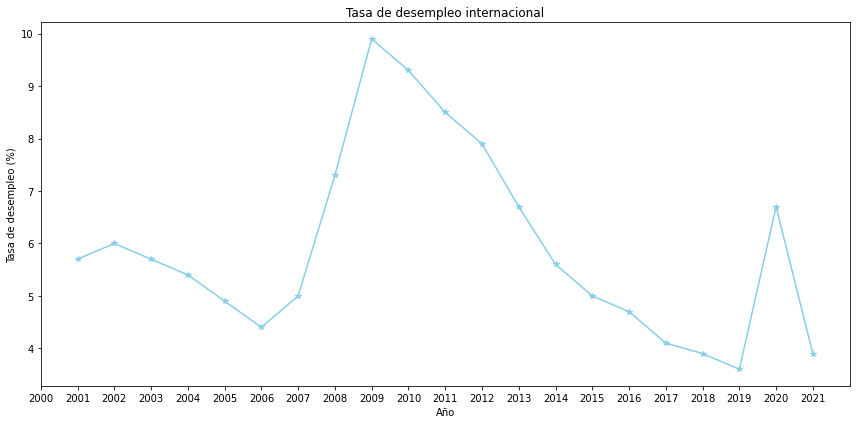

In [9]:

# Seleccionamos los fechas a partir del 2001

desempleo_anual = desempleo_anual[desempleo_anual["fecha"]>2000]

# # COMO EJEMPLO Ahora podemos hacer nuestro primer gráfico
plt.figure(figsize=(12,6))
plt.plot(desempleo_anual['fecha'], desempleo_anual['Tasa desempleo'], color="skyblue", marker="*")
plt.xlabel('Año')
plt.ylabel('Tasa de desempleo (%)')
plt.title('Tasa de desempleo internacional')
plt.tight_layout()
plt.xticks(range(2000, 2022))
plt.show()

ESTO SE PUEDE USAR PARA HALLAR RELACIÓN CON LA TDA NACIONAL E INTERNACIONAL

In [10]:
desempleo_anual_nacional = pd.read_csv(os.path.join("BCR BDS/Desempleo Trimestral.csv"), encoding='latin1')

In [11]:
# Ahora veamos los otro datasets del BCR, en este caso la TDA en el rango de edad de 14 a 24 fechas

df = pd.read_csv(os.path.join("BCR BDS/Desempleo Trimestral.csv"), encoding='latin1')
df.columns = ['fecha', 'tasa']
df.drop(0, axis=0, inplace=True)
df.head(10)

,fecha,tasa
1,May01,9.24075367634935
2,Jun01,9.48972410095447
3,Jul01,9.19606264068008
4,Ago01,9.4914844759539
5,Sep01,9.54805083979688
6,Oct01,9.71633245341955
7,Nov01,9.45120342828156
8,Dic01,8.86143941652261
9,Ene02,9.32425639872332
10,Feb02,9.9702139392871


In [12]:
# Como observamos las fechas están en el formato "mmmYY"
# Por lo que tenemos que convertirlo a fecha
# Para esto usaremos pd.to_datetime; sin embargo, el formato solo acepta meses en inglés

month_translation = {
        'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun', 
        'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'
    }
for es, en in month_translation.items():
    df['fecha']=df['fecha'].str.replace(es,en)


df['fecha'] = pd.to_datetime(df['fecha'], format="%b%y")
df.rename(columns={'fecha':'fecha'})


,fecha,tasa
1,2001-05-01,9.24075367634935
2,2001-06-01,9.48972410095447
3,2001-07-01,9.19606264068008
4,2001-08-01,9.4914844759539
5,2001-09-01,9.54805083979688
...,...,...
272,2023-12-01,6.384513858337
273,2024-01-01,7.2
274,2024-02-01,7.29436389085165
275,2024-03-01,7.7059512329522


In [13]:
def group_year(df):
    df['tasa'] = df['tasa'].astype(float)
    df=pd.DataFrame(df.groupby(df["fecha"].dt.year)["tasa"].mean())
    df=df.reset_index().rename(columns={'fecha':'año'})

    return df

df = group_year(df)

In [14]:
df

,año,tasa
0,2001,9.374381
1,2002,9.371590
2,2003,9.361061
3,2004,9.519716
4,2005,9.631475
5,2006,8.524133
6,2007,8.447123
7,2008,8.309796
8,2009,8.354932
9,2010,8.032757


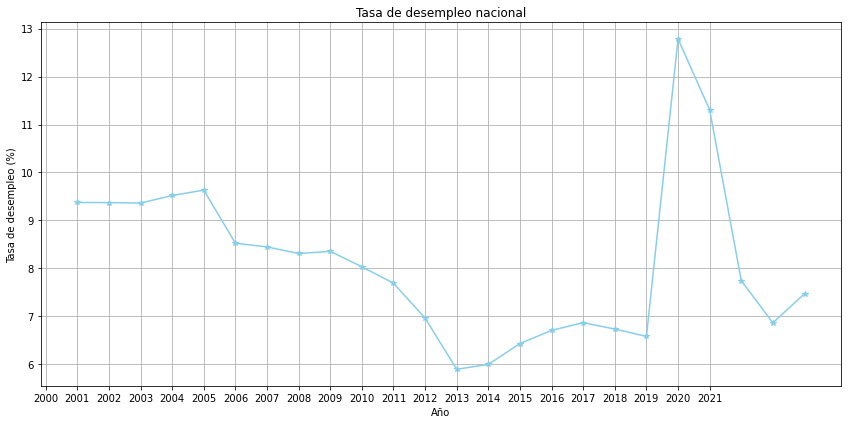

In [15]:

plt.figure(figsize=(12,6))
plt.plot(df['año'], df['tasa'], color="skyblue", marker="*")
plt.xlabel('Año')
plt.ylabel('Tasa de desempleo (%)')
plt.title('Tasa de desempleo nacional')
plt.tight_layout()
plt.grid()
plt.xticks(range(2000, 2022))
plt.show()

## 5. DATA CLEANING Y FORMATTING <a name="clean"></a>

Con la exploración previa ahora sabemos como limpiar las bds respectivas

In [16]:
#Ahora apliquemos lo mismo para los otros dataframes.

def cargar(paths):
    month_translation = {
        'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun', 
        'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'
    }
    dfs = []
    for archivo in paths:
        df = pd.read_csv(os.path.join(path, archivo), encoding='latin1')
        df.columns = ['fecha', 'tasa']
        df.drop(0, axis=0, inplace=True)
        
        # Traducir nombres de meses
        for es, en in month_translation.items():
            df['fecha'] = df['fecha'].str.replace(es, en)
        
        # Convertir a datetime y extraer el fecha
        df['fecha'] = pd.to_datetime(df['fecha'], format='%b%y')
        df['fecha']        
        df.dropna(axis=1)
    
        # Convertir los valores de la columna 'tasa' a numérico, convirtiendo los no numéricos a NaN
        df['tasa']= pd.to_numeric(df['tasa'], errors="coerce").round(2)
        

        
        dfs.append(df)
    
    return dfs

archivos = [
    "Desempleo 14_24.csv", 
    "Desempleo 25_44.csv", 
    "Desempleo 45.csv",
    "Desempleo Trimestral.csv",
    "Desempleo_H.csv",
    "Desempleo_M.csv"
]





In [17]:
dfs = cargar(archivos)


## Estadísticas Generales <a name="est"></a>

In [18]:
des24=dfs[0]
des44=dfs[1]
des45=dfs[2]

In [19]:

# Función para calcular estadísticas métricas
def calcular_estadisticas(data):
    estadisticas = {
        'Media': data['tasa'].mean(),
        'Desviación Estándar': data['tasa'].std(),
        'Varianza': data['tasa'].var()
    }
    return estadisticas

# Calcular estadísticas para cada grupo de edad
estadisticas_14_24 = calcular_estadisticas(des24)
estadisticas_25_44 = calcular_estadisticas(des44)
estadisticas_45 = calcular_estadisticas(des45)

# Mostrar estadísticas
print("Estadísticas Métricas para el Grupo de Edad 14-24: \n", estadisticas_14_24, "\n")
print("Estadísticas Métricas para el Grupo de Edad 25-44: \n", estadisticas_25_44, "\n")
print("Estadísticas Métricas para el Grupo de Edad 45+: \n", estadisticas_45, "\n")


Estadísticas Métricas para el Grupo de Edad 14-24: 
 {'Media': 15.95590579710145, 'Desviación Estándar': 3.486162085394051, 'Varianza': 12.153326085639} 

Estadísticas Métricas para el Grupo de Edad 25-44: 
 {'Media': 6.324963768115942, 'Desviación Estándar': 2.06525076587692, 'Varianza': 4.265260725955204} 

Estadísticas Métricas para el Grupo de Edad 45+: 
 {'Media': 5.076847826086957, 'Desviación Estándar': 2.0556875935349317, 'Varianza': 4.2258514822134385} 



**Grupo de Edad 14-24 años:**
- La tasa de desempleo promedio es del 15.96%, indicando que los jóvenes en este rango de edad enfrentan una alta tasa de desempleo.
- La desviación estándar es de 3.49%, lo que sugiere una variabilidad moderada alrededor de la media.
- La varianza de 12.15 confirma una considerable dispersión en las tasas de desempleo dentro de este grupo.

**Grupo de Edad 25-44 años:**
- La tasa de desempleo promedio es del 6.32%, significativamente menor que la del grupo de edad más joven, indicando mejores oportunidades laborales.
- La desviación estándar es de 2.07%, indicando una menor variabilidad alrededor de la media en comparación con el grupo de 14-24 años.
- La varianza de 4.27 refuerza que la dispersión de los datos es menor en este grupo comparado con el grupo de edad 14-24.

**Grupo de Edad 45+ años:**
- La tasa de desempleo promedio es del 5.08%, la más baja entre los tres grupos, indicando las mejores oportunidades laborales.
- La desviación estándar es de 2.06%, mostrando una variabilidad similar a la del grupo de edad 25-44.
- La varianza de 4.23 sugiere una dispersión más pequeña en las tasas de desempleo para este grupo.

## Análisis de series temporales (VIZ)<a name="v"></a>

In [20]:
desempleo_h = dfs[4]
desempleo_m = dfs[5]

In [21]:
desempleo_h = group_year(desempleo_h)
desempleo_m = group_year(desempleo_m)


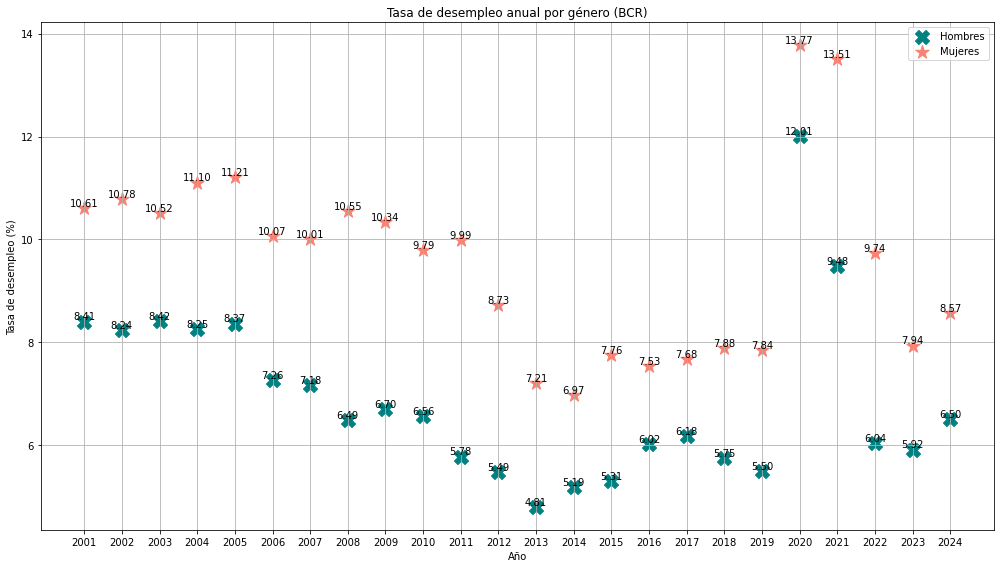

In [28]:
# Veamos ahora como ha ido variando la tasa de desempleo desde el 2000, según el género.
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))

# Plotting men data
plt.scatter(desempleo_h['año'], desempleo_h['tasa'], label='Hombres', color='teal', marker='X', s=200)

# Plotting women data
plt.scatter(desempleo_m['año'], desempleo_m['tasa'], label='Mujeres', color='salmon', marker='*', s= 200)

# Encontrar y anotar los puntos más altos
max_h = desempleo_h.loc[desempleo_h['tasa'].idxmax()]
max_m = desempleo_m.loc[desempleo_m['tasa'].idxmax()]


plt.xlabel('Año')
plt.ylabel('Tasa de desempleo (%)')
plt.title('Tasa de desempleo anual por género (BCR)')
plt.legend()

for i, row in desempleo_h.iterrows():
        plt.text(row['año'], row['tasa'], f"{row['tasa']:.2f}", ha='center', va='bottom')
for i, row in desempleo_m.iterrows():
    plt.text(row['año'], row['tasa'], f"{row['tasa']:.2f}", ha='center', va='bottom')
plt.grid()
plt.xticks(desempleo_h['año'])
plt.tight_layout()
plt.show()



 Podemos plantear algunas hipótesis sobre los cambios en la TDA (Tasa de Desocupación Abierta) en estos fecha
s. 


Evidentemente, en el fecha
 2020 debido a la pandemia la tasa de desempleo se elevó exponencialmente, 
llegando hasta 17.9% en el caso de las mujeres y 16.2% en el caso de los hombres.
 


# Podemos usar intervalos de años

In [72]:

# Función para generar gráficos separados para cada temporada
def plot_temporada(name, start_fecha, end_fecha, destotal, colors):
    plt.figure(figsize=(14, 8))

    # Convertir fechas a tipo datetime para la comparación
    start_fecha = pd.to_datetime(start_fecha, format='%Y')
    end_fecha = pd.to_datetime(end_fecha, format='%Y')

    # Filtrar datos para el periodo de crisis
    
    for i in range(len(destotal)):
        
        data = destotal[i][(destotal[i]['fecha'] >= start_fecha) & (destotal[i]['fecha'] <= end_fecha)]


        # Graficar datos para el grupo de 14-24 fechas
        plt.plot(data['fecha'], data['tasa'], color= list(colors.values())[i], marker='o', label=list(colors.keys())[i])

        # Encontrar y anotar los puntos más altos y más bajos
        maxtasa = data.loc[data['tasa'].idxmax()]
        mintasa = data.loc[data['tasa'].idxmin()]
        plt.annotate(f'{maxtasa["tasa"]:.1f}%', (maxtasa['fecha'], maxtasa['tasa']),
                     textcoords="offset points", xytext=(0,10), ha='center', color=list(colors.values())[i])
        plt.annotate(f'{mintasa["tasa"]:.1f}%', (mintasa['fecha'], mintasa['tasa']),
                     textcoords="offset points", xytext=(0,-15), ha='center',color=list(colors.values())[i])


    plt.xlabel('Año')
    plt.ylabel('Tasa de desempleo (%)')
    
    plt.title(f'Tasa de desempleo anual durante {name}')
    plt.xticks(rotation=45)
    plt.legend(colors)
    plt.tight_layout()
    plt.show()

# Generar gráficos para cada crisis



Como se observa cada crisis tiene bastantes variaciones.

### Pandemia de COVID-19 (2020-2021)
La pandemia de COVID-19, que comenzó en 2020, causó una crisis económica global sin precedentes debido a las medidas de confinamiento y las interrupciones en la actividad económica. La pandemia provocó un aumento repentino del desempleo, ya que muchas empresas cerraron temporalmente o redujeron significativamente su personal. Los sectores de servicios, turismo y entretenimiento fueron los más afectados. Los gobiernos implementaron paquetes de estímulo económico para mitigar el impacto, pero la recuperación ha sido desigual entre diferentes sectores y grupos demográficos. Analizar el impacto de la pandemia de COVID-19 en el desempleo es crucial para entender cómo las emergencias sanitarias pueden transformar rápidamente el panorama laboral y económico.

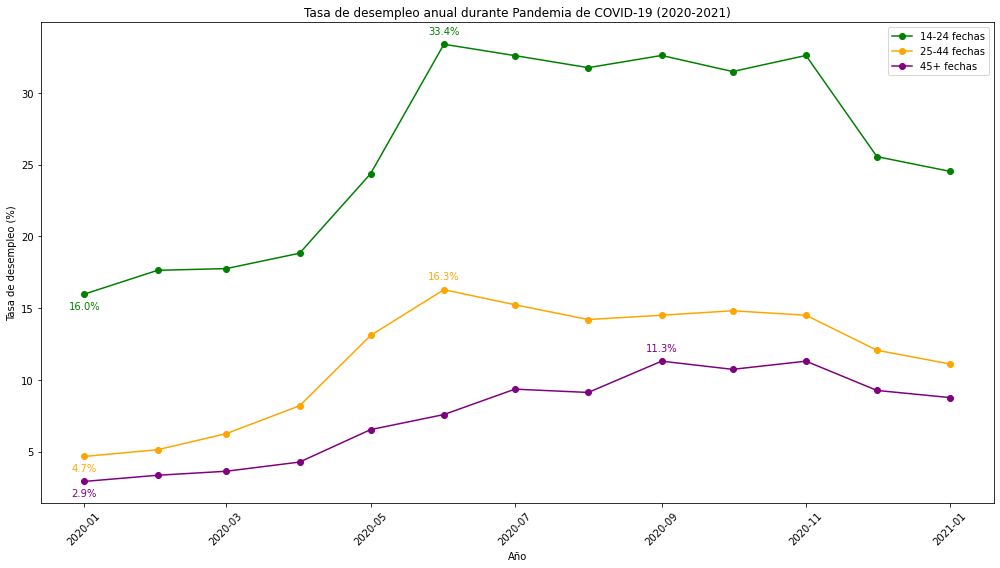

KeyError: 'fecha'

<Figure size 1008x576 with 0 Axes>

In [73]:
plot_temporada('Pandemia de COVID-19 (2020-2021)', 2020, 2021, des, colors)
plot_temporada('Pandemia de COVID-19 (2020-2021)', 2020, 2021, des_hm, colors_hm)

# POR RANGO DE EDAD

In [70]:
def plot_category(dfs, labels, colors, title, xlabel, ylabel, annotate=False, max_annotate=False):
    
    plt.figure(figsize=(14, 8))

    for i in range(len(dfs)):
        plt.bar( dfs[i]['año'], dfs[i]['tasa'],label=labels[i], color=colors[i])
        if max_annotate==True:
            max_h = dfs[i].loc[dfs[i]['tasa'].idxmax()]
            plt.annotate(f'{max_h["tasa"]:.2f}%', (max_h['año'], max_h['tasa']),
            textcoords="offset points", xytext=(0,10), ha='center')
        if annotate==True:
            for i, row in dfs[i].iterrows():
                plt.annotate(f'{row["tasa"]:.2f}%', (row['año'], row['tasa']),
                             textcoords="offset points", xytext=(0,10), ha='center', va='bottom')
    

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    

    plt.grid()
    plt.xticks(range(2001,2025))
    plt.tight_layout()
    plt.show()


In [33]:
# agrupamos por año
tda_14=group_year(dfs[0])
tda_44=group_year(dfs[1])
tda_45=group_year(dfs[2])

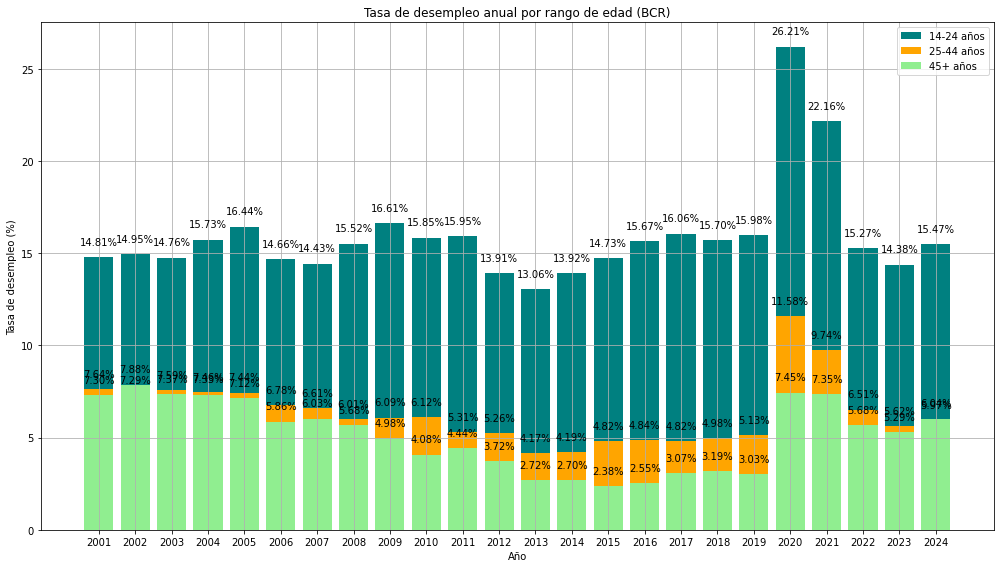

In [71]:
plot_category([tda_14, tda_44, tda_45], ['14-24 años','25-44 años', '45+ años'], colors=['teal','orange','lightgreen'], title='Tasa de desempleo anual por rango de edad (BCR)',xlabel='Año',ylabel= 'Tasa de desempleo (%)', annotate=True, max_annotate=False)